<a href="https://colab.research.google.com/github/relfarizi/Final_Project/blob/master/diversity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
# Install rdkit

def install_rdkit():
  !wget -c https://repo.continuum.io/miniconda/Miniconda3-latest-Linux-x86_64.sh
  !chmod +x Miniconda3-latest-Linux-x86_64.sh
  !time bash ./Miniconda3-latest-Linux-x86_64.sh -b -f -p /usr/local
  !time conda install -q -y -c conda-forge rdkit

install_rdkit()

--2020-07-08 04:26:31--  https://repo.continuum.io/miniconda/Miniconda3-latest-Linux-x86_64.sh
Resolving repo.continuum.io (repo.continuum.io)... 104.18.200.79, 104.18.201.79, 2606:4700::6812:c94f, ...
Connecting to repo.continuum.io (repo.continuum.io)|104.18.200.79|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://repo.anaconda.com/miniconda/Miniconda3-latest-Linux-x86_64.sh [following]
--2020-07-08 04:26:31--  https://repo.anaconda.com/miniconda/Miniconda3-latest-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.130.3, 104.16.131.3, 2606:4700::6810:8203, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.130.3|:443... connected.
HTTP request sent, awaiting response... 416 Requested Range Not Satisfiable

    The file is already fully retrieved; nothing to do.

PREFIX=/usr/local
Unpacking payload ...
Solving environment: / - \ | / - \ | / done

## Package Plan ##

  environment loca

In [13]:
!conda install -c conda-forge rdkit

Solving environment: | / - \ | / - \ | / - \ | / - \ | / - \ | / done

# All requested packages already installed.



In [15]:
!conda activate my-rdkit-env


CommandNotFoundError: Your shell has not been properly configured to use 'conda activate'.
To initialize your shell, run

    $ conda init <SHELL_NAME>

Currently supported shells are:
  - bash
  - fish
  - tcsh
  - xonsh
  - zsh
  - powershell

See 'conda init --help' for more information and options.

IMPORTANT: You may need to close and restart your shell after running 'conda init'.




In [19]:
!pip install --upgrade pip

     |████████████████████████████████| 1.5 MB 2.8 MB/s 
  Attempting uninstall: pip
    Found existing installation: pip 20.0.2
    Uninstalling pip-20.0.2:
      Successfully uninstalled pip-20.0.2


In [12]:
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')
from rdkit import Chem
from rdkit.Chem import DataStructs,AllChem,Draw
from rdkit.Chem.Draw import IPythonConsole
import pandas as pd
import numpy as np

In [3]:
dataset =  pd.read_csv('https://raw.githubusercontent.com/relfarizi/Final_Project/master/Dataset_After1.csv', index_col= 0)
dataset

,Molecule ChEMBL ID,Smiles,Standard Relation,Standard Value,Standard Units
0,CHEMBL2263120,CC1(C)CC[C@]2(C(=O)OCCCCCCCCCCC(=O)O)CC[C@]3(C...,'=',0.7200,nM
1,CHEMBL2263121,CC1(C)CC[C@]2(C(=O)NC(Cc3ccccc3)C(=O)O)CC[C@]3...,'=',3.3100,nM
2,CHEMBL168,CC1(C)CC[C@]2(C(=O)O)CC[C@]3(C)C(=CC[C@@H]4[C@...,'=',5.0501,nM
3,CHEMBL508831,CC1(C)CC[C@]2(C(=O)O)CC[C@]3(C)C(=CC[C@@H]4[C@...,'=',0.5400,nM
4,CHEMBL506556,CC1(C)CC[C@]2(C(=O)O)CC[C@]3(C)C(=CC[C@@H]4[C@...,'=',0.6200,nM
...,...,...,...,...,...
1447,CHEMBL1782241,CC(C)=CCC/C(C)=C/Cc1c(O)c(CC=C(C)C)c(O)c2c(=O)...,'=',5.2000,nM
1448,CHEMBL323197,COc1c(O)cc2oc3cc(O)c(CC=C(C)C)c(O)c3c(=O)c2c1C...,'=',5.5000,nM
1449,CHEMBL4071698,CCCc1cc(O)cc(OC(=O)c2c(O)cc(O)cc2CCC)c1,'=',0.7200,nM
1450,CHEMBL3770020,CCCc1cc(O)cc(O)c1C(=O)O,'=',1.5800,nM


In [36]:
molSmiles = dataset["Smiles"].tolist()
molA = Chem.MolFromSmiles(molSmiles[0])
molB = Chem.MolFromSmiles(molSmiles[1])
molLs = [molA,molB]

In [38]:
fpLs = [AllChem.RDKFingerprint(molLs[i], maxPath=5, bitInfo=rdkbi) for i in range(2)]


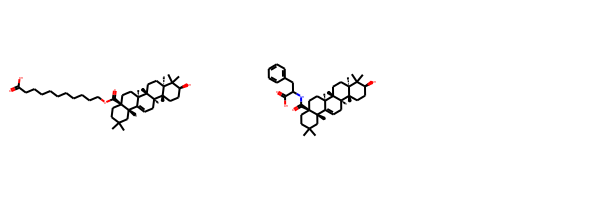

In [39]:
Draw.MolsToGridImage(molLs)

In [41]:
simT = DataStructs.FingerprintSimilarity(fpLs[0],fpLs[1])
simT

0.39403973509933776

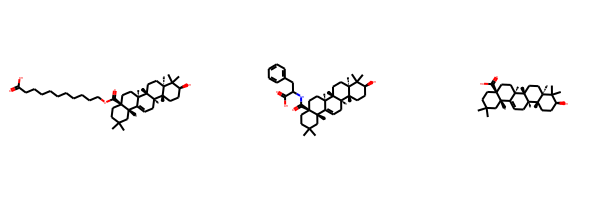

In [31]:
molSmilesLs = [Chem.MolFromSmiles(molSmiles[i]) for i in range(3)]

img = Draw.MolsToGridImage(molSmilesLs)
img

In [6]:
molSmilesLs[1]

In [ ]:
fp = AllChem.GetMorganFingerprintAsBitVect(molSmilesLs[0],2,nBits=1024,bitInfo = bi)
fpArr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp,fpArr)
np.nonzero(fpArr)
list(fp.GetOnBits())
list(fpArr)''

SyntaxError: invalid syntax (<ipython-input-6-cc882f6f4736>, line 6)

In [17]:
rdkbi = {}
#mol = [[molSmilesLs[0],x,bi] for x in fp.GetOnBits()]
#print(mol)

fpArr = np.zeros((1,))
molekul = 'C(C(=O)O)N'
smiles = Chem.MolFromSmiles(molekul)
fp = AllChem.RDKFingerprint(smiles, maxPath=5, bitInfo=rdkbi)
DataStructs.ConvertToNumpyArray(fp,fpArr)
np.nonzero(fpArr)
list(fp.GetOnBits())



[112,
 525,
 562,
 733,
 766,
 929,
 993,
 1039,
 1075,
 1105,
 1148,
 1153,
 1166,
 1183,
 1308,
 1339,
 1458,
 1728,
 1772,
 1776,
 1833,
 1901,
 1907,
 2047]

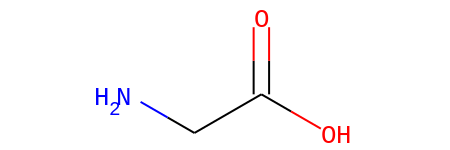

In [18]:
smiles

In [9]:
print(bi)

{27: ((0, 1),), 80: ((0, 0),), 147: ((4, 0),), 389: ((3, 1),), 650: ((2, 0),), 713: ((1, 1),), 807: ((1, 0), (3, 0)), 893: ((2, 1),), 966: ((0, 2),), 981: ((4, 1),)}


In [20]:
prints = [(smiles,x,rdkbi) for x in rdkbi]
#print(prints)
#smiles
Draw.DrawRDKitBits(prints[:12],molsPerRow=4,legends=[str(x) for x in rdkbi][:12])
legends=[str(x) for x in fp.GetOnBits()]
print(legends)

['112', '525', '562', '733', '766', '929', '993', '1039', '1075', '1105', '1148', '1153', '1166', '1183', '1308', '1339', '1458', '1728', '1772', '1776', '1833', '1901', '1907', '2047']


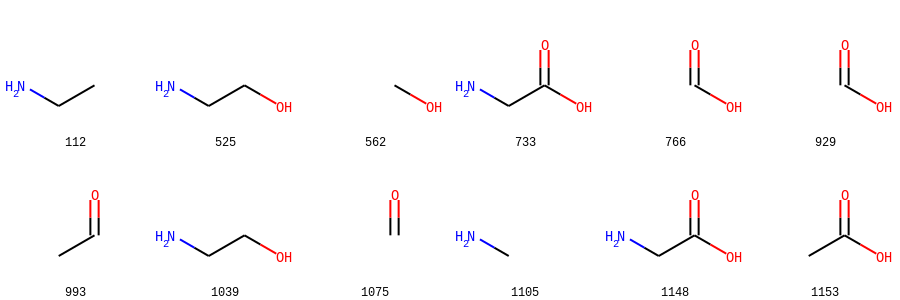

In [23]:
Draw.DrawRDKitBits(prints[:12],molsPerRow=6,legends=[str(x) for x in rdkbi][:12])